## Задание 1 - часть 1 - Квадратик

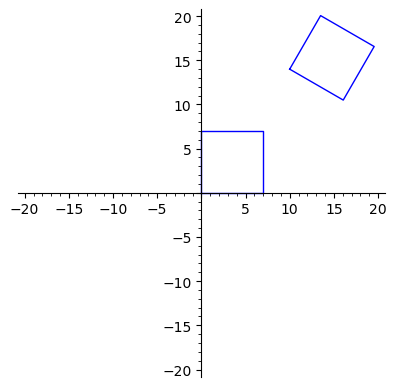

In [1]:
a = 7
rectangle_src = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
alpha = math.radians(-30)
mat_rot = matrix([
    [cos(alpha), sin(alpha)]
    , [ -sin(alpha), cos(alpha)]
])
rectangle_rotated =  rectangle_src * mat_rot

mat_shift = matrix([[10,14], [10,14], [10,14], [10,14], [10,14]])
rectangle_shifted = rectangle_rotated + mat_shift

show(line(rectangle_src) + line(rectangle_shifted)
    , xmin=-20, xmax=20, ymin=-20, ymax=20, aspect_ratio=1)

## Задание 1 - часть 2 - Исследование функции

### Варианты:

In [2]:
tasks = [ 
            sin(2*x**3)**2/x**3
            , (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)
            , sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)
            , 1/2 * ln(sqrt(x^2 + 1) / sqrt(x^2 - 1)) - 15*x**2
            , (x^3 - x^2 - x + 1)^(1/3) / tan(x)
            , 2*log((x - 1) / x) + 1
            , ln(x - 1) / (x - 1)^2
        ]

In [3]:
def get_variant_for_number(_number, _variations_quo):
    return (_number - 1) % _variations_quo


your_number = 1
number_of_your_task = get_variant_for_number(_number=your_number, _variations_quo=len(tasks))
print(f"Номер вашего задания: {number_of_your_task}.")
show("Ваша функция: ", tasks[number_of_your_task])

Номер вашего задания: 0.


'Ваша функция: ' sin(2*x^3)^2/x^3

### 1. Область определения функции.

In [4]:
f(x) = tasks[number_of_your_task]
show(f(x))

sin(2*x^3)^2/x^3

In [5]:
# Точки, не входящие в область определения
not_domain = list()

g(x) = x^3
sols = solve(g == 0, x)

for i, sol in enumerate(sols):
    not_domain.append(sol.rhs())
    show(LatexExpr("x_{} = {}".format(i, not_domain[i].n(digits=5))))

x_0 = 0.00000

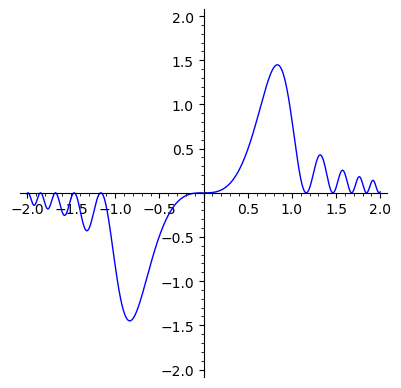

In [6]:
plot(f, ymin=-2, ymax=2, xmin=-2, xmax=2, aspect_ratio=1, exclude=not_domain)

### 2. Является ли функция четной или нечетной, является ли периодической.

In [7]:
# Четность
g1 = f(x) - f(-x)
show(LatexExpr("f(x) - f(-x) = " + str(g1.simplify_full())))

g2 = f(x) + f(-x)
show(LatexExpr("f(x) + f(-x) = " + str(g2.simplify())))

f(x) - f(-x) = 8*cos(x^3)^2*sin(x^3)^2/x^3

f(x) + f(-x) = 0

$f(x) \neq f(-x).$ Функция не является четной.

$f(x) = -f(-x).$ Функция является нечетной.

In [8]:
# Периодичность
var("T")
g = f(x) - f(x + T)
solve(g, T)

[T == -1/2*x*(I*sqrt(3) + 1)*(sin(2*T^3 + 6*T^2*x + 6*T*x^2 + 2*x^3)^2/sin(2*x^3)^2)^(1/3) - x, T == -1/2*x*(-I*sqrt(3) + 1)*(sin(2*T^3 + 6*T^2*x + 6*T*x^2 + 2*x^3)^2/sin(2*x^3)^2)^(1/3) - x, T == x*(sin(2*T^3 + 6*T^2*x + 6*T*x^2 + 2*x^3)^2/sin(2*x^3)^2)^(1/3) - x]

Решений нет. Функция не периодическая.

### 3. Точки пересечения графика с осями координат.

Пересечения с осью $Ox$.

In [9]:
roots_zero = list()

# Аналитические корни
sols = solve(f == 0, x)
for i, sol in enumerate(filter(lambda x: x.rhs() not in not_domain, sols)):
    roots_zero.append(sols[i].rhs().n())

# Численные корни
roots_zero.append(find_root(f, -1.3, -1.5))
roots_zero.append(find_root(f, -1, -1.4))
roots_zero.append(find_root(f, 1, 1.4))
roots_zero.append(find_root(f, 1.3, 1.5))

In [10]:
for i, root in enumerate(roots_zero):
    show(LatexExpr("x_{} = {}".format(i, round(root, 5))))

x_0 = -1.46459

x_1 = -1.16245

x_2 = 1.16245

x_3 = 1.46459

Пересечений с осью $Oy$ нет, так как $x = 0$ не входит в область определения.

### 4. Промежутки знакопостоянства.

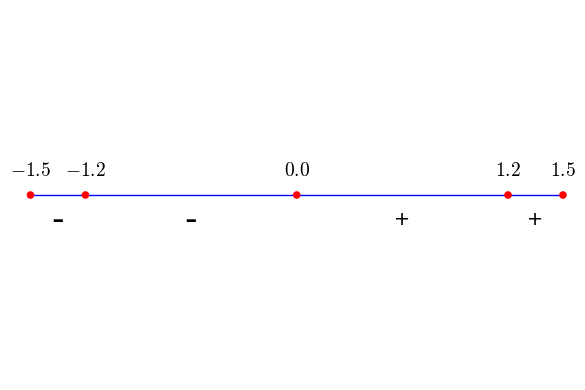

In [11]:
roots = roots_zero + not_domain
roots.sort()

intervals_of_constancy = plot(0, xmin=roots[0], xmax=roots[-1], ymin=-0.5, ymax=0.5)

y_margin = 0.07

# Точки
for root in roots:
    intervals_of_constancy += point((root, 0), color="red", size=30, zorder=10)
    intervals_of_constancy += text("${}$".format(round(root,1)), (root, y_margin), color="black", fontsize=14)

# Подписи промежутков
for i in range(len(roots)-1):
    cur = (roots[i] + roots[i+1]) / 2
    if f(cur).n() > 0:
        intervals_of_constancy += text("+", (cur, -y_margin), color="black", fontsize=14)
    else:
        intervals_of_constancy += text("-", (cur, -y_margin), color="black", fontsize=25)

intervals_of_constancy.show(axes=False)

### 5. Промежутки возрастания и убывания.

Первая производная функции и ее график.

f'(x) =  12*cos(2*x^3)*sin(2*x^3)/x - 3*sin(2*x^3)^2/x^4

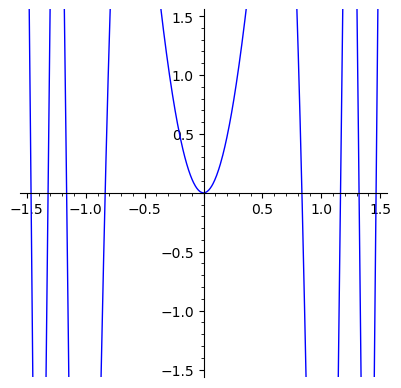

In [12]:
df = f.diff(x)
show(LatexExpr("f'(x) = "), df(x))
plot(df, ymin=-1.5, ymax=1.5, xmin=-1.5, xmax=1.5, aspect_ratio=1, exclude=not_domain)

In [13]:
roots_extreme = list()

# Аналитические корни
roots_extreme.append(df.find_root(-1.4, -1.5))
roots_extreme.append(df.find_root(-1.2, -1.4))
roots_extreme.append(df.find_root(-1, -1.2))
roots_extreme.append(df.find_root(-0.5, -1))
roots_extreme.append(df.find_root(0.5, 1))
roots_extreme.append(df.find_root(1, 1.2))
roots_extreme.append(df.find_root(1.2, 1.4))
roots_extreme.append(df.find_root(1.4, 1.5))

In [14]:
for i, root in enumerate(roots_extreme):
    show(LatexExpr("x_{} = {}".format(i, round(root, 5))))

x_0 = -1.46459

x_1 = -1.32041

x_2 = -1.16245

x_3 = -0.83529

x_4 = 0.83529

x_5 = 1.16245

x_6 = 1.32041

x_7 = 1.46459

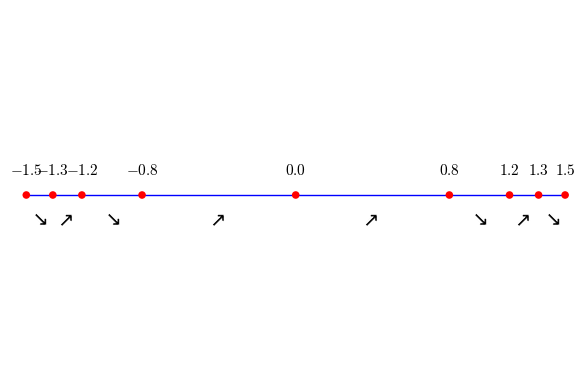

In [15]:
roots = roots_extreme + not_domain
roots.sort()

intervals_of_growth = plot(0, xmin=roots[0], xmax=roots[-1], ymin=-0.5, ymax=0.5)

y_margin = 0.07
angle = 45

# Точки
for root in roots:
    intervals_of_growth += point((root, 0), color="red", size=30, zorder=10)
    intervals_of_growth += text("${}$".format(round(root,1)), (root, y_margin), color="black", fontsize=11)

# Подписи промежутков
for i in range(len(roots)-1):
    cur = (roots[i] + roots[i+1]) / 2
    if df(cur).n() > 0:
        intervals_of_growth += text("→", (cur, -y_margin), rotation=angle, color="black", fontsize=14)
    else:
        intervals_of_growth += text("→", (cur, -y_margin), rotation=-angle, color="black", fontsize=14)

intervals_of_growth.show(axes=False)

### 6. Точки экстремума и значения в этих точках

Вторая производная функции и ее график.

f''(x) =  72*x*cos(2*x^3)^2 - 72*x*sin(2*x^3)^2 - 48*cos(2*x^3)*sin(2*x^3)/x^2 + 12*sin(2*x^3)^2/x^5

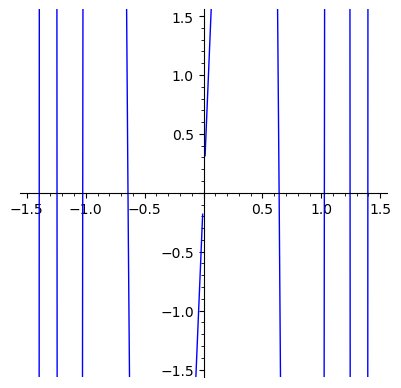

In [16]:
ddf = df.diff(x)
show(LatexExpr("f''(x) = "), ddf(x))
plot(ddf, ymin=-1.5, ymax=1.5, xmin=-1.5, xmax=1.5, aspect_ratio=1, exclude=not_domain)

In [17]:
for i, root in enumerate(roots_extreme):
    if ddf(root).n() > 0:
        show(LatexExpr(r"x_{0} = {1},\ f(x_{0}) = {2}".format(i, round(root, 5), round(f(root), 5))), 
             " - точка локального максимума")
    else:
        show(LatexExpr(r"x_{0} = {1},\ f(x_{0}) = {2}".format(i, round(root, 5), round(f(root), 5))), 
             " - точка локального минимума")

x_0 = -1.46459,\ f(x_0) = -0.0 ' - точка локального минимума'

x_1 = -1.32041,\ f(x_1) = -0.42932 ' - точка локального максимума'

x_2 = -1.16245,\ f(x_2) = -0.0 ' - точка локального минимума'

x_3 = -0.83529,\ f(x_3) = -1.44922 ' - точка локального максимума'

x_4 = 0.83529,\ f(x_4) = 1.44922 ' - точка локального минимума'

x_5 = 1.16245,\ f(x_5) = 0.0 ' - точка локального максимума'

x_6 = 1.32041,\ f(x_6) = 0.42932 ' - точка локального минимума'

x_7 = 1.46459,\ f(x_7) = 0.0 ' - точка локального максимума'

### 7. Непрерывность. Наличие точек разрыва и их классификация.

In [18]:
for i, root in enumerate(not_domain):
    lim_left = lim(f, x=root, dir="left")
    lim_right = lim(f, x=root, dir="right")
    if (lim_left == lim_right and lim_left != oo):
        show(LatexExpr("x_{} = {}".format(i, root)), " - разрыв первого рода")
    else:
        show(LatexExpr("x_{} = {}".format(i, root)), " - разрыв второго рода")

x_0 = 0 ' - разрыв первого рода'

### 8. Асимптоты.

In [19]:
lim_inf_right = lim(f, x = +oo)
show(LatexExpr(r"\lim_{x \to +\infty} f(x) = ") + str(lim_inf_right.simplify_full()))
lim_inf_left = lim(f, x = -oo)
show(LatexExpr(r'\lim_{x \to -\infty} f(x) = ') + str(lim_inf_left.simplify_full()))

\lim_{x \to +\infty} f(x) = 0

\lim_{x \to -\infty} f(x) = 0

В точке разрыва асимптоты не существует.

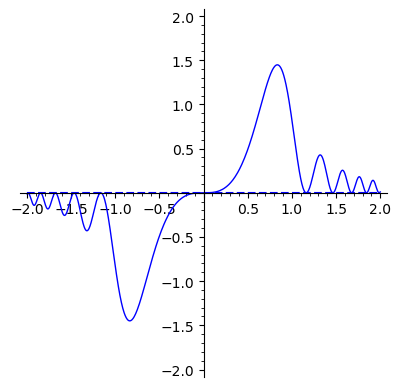

In [20]:
plot(f, ymin=-2, ymax=2, xmin=-2, xmax=2, aspect_ratio=1, exclude=not_domain) + \
line([(-2,0), (2,0)], linestyle='--', thickness=1.5)